<a href="https://colab.research.google.com/github/dibab64/deeplearning-dibab/blob/main/voc2007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset downloaded as `pascal-voc-2007.zip`

In [2]:
from google.colab import userdata
userdata.get('furkansoyupak')

'629d247b92b8bdd63d8ea85cfe54fecd'

In [6]:
!mkdir /root/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
!mv /content/kaggle.json /root/.kaggle/kaggle.json

In [10]:
!chmod 600 /root/.kaggle/kaggle.json

In [11]:
!kaggle datasets download -d zaraks/pascal-voc-2007

... resuming from 250609664 bytes (1524241964 bytes left) ...
100% 1.65G/1.65G [00:52<00:00, 35.6MB/s]
100% 1.65G/1.65G [00:52<00:00, 29.1MB/s]


In [12]:
!unzip pascal-voc-2007.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001729.jpg  
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001730.jpg  
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001732.jpg  
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001733.jpg  
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001734.jpg  
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001738.jpg  
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001739.jpg  
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001741.jpg  
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001746.jpg  
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001747.jpg  
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001749.jpg  
  inflating: voctrainval_06-nov-2007/VOCdevkit/VOC2007/JPEGImages/001750.jpg  
  inf

Import required libraries

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [21]:
import pandas as pd
import random
import seaborn as sns

EDA for PASCAL VOC

In [19]:
datset_path = '/content/VOCtrainval_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages'
annotations = '/content/VOCtrainval_06-Nov-2007/VOCdevkit/VOC2007/Annotations'

In [ ]:
os.listdir(annotations)

#XML files


2. XML to Dataframe

In [22]:
import xml.etree.ElementTree as ET

In [23]:
def xml_to_dataframe(xml_path):
   # Parse XML
   tree = ET.parse(xml_path)
   root = tree.getroot()

   # Initialize lists to store data
   filename = []
   width = []
   height = []
   class_names = []

   # Iterate over each object in the XML
   for member in root.findall('object'):
       value = (root.find('filename').text,
                int(root.find('size')[0].text),
                int(root.find('size')[1].text),
                member[0].text)
       filename.append(value[0])
       width.append(value[1])
       height.append(value[2])
       class_names.append(value[3])

   # Create a dataframe
   df = pd.DataFrame(list(zip(filename, width, height, class_names)),
                    columns=['filename', 'width', 'height', 'class'])
   return df


In [25]:
dfs = []

# Iterate over each XML file in the dataset
for file in os.listdir(annotations):
   if file.endswith('.xml'):
       df = xml_to_dataframe(os.path.join(annotations, file))
       dfs.append(df)

In [26]:
df = pd.concat(dfs, ignore_index=True)

In [81]:
df.describe()

,width,height
count,15662.000000,15662.000000
mean,478.210318,380.052803
std,52.162357,58.953485
min,127.000000,96.000000
25%,500.000000,334.000000
50%,500.000000,375.000000
75%,500.000000,375.000000
max,500.000000,500.000000


In [31]:
df.duplicated().sum()
df['class'].unique()


array(['person', 'horse', 'car', 'aeroplane', 'cat', 'chair', 'train',
       'sofa', 'tvmonitor', 'boat', 'dog', 'pottedplant', 'bird',
       'bicycle', 'diningtable', 'motorbike', 'bottle', 'sheep', 'cow',
       'bus'], dtype=object)

In [45]:
class_names = df.groupby('class').size()

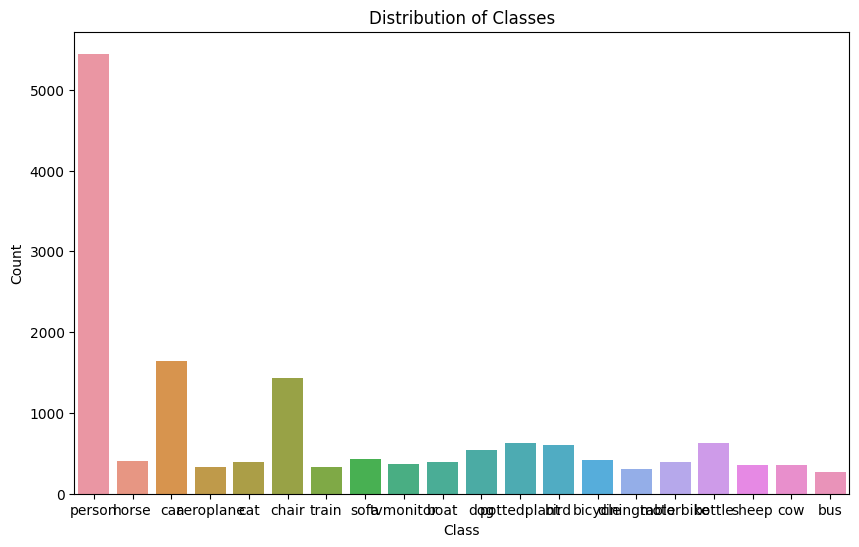

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(x='class', data=df)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [56]:
image_paths = datset_path
annotation_paths = annotations


In [80]:
import glob
import pandas as pd
import xml.etree.ElementTree as ET

def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        print(xml_file)
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            bbx = member.find('bndbox')
            xmin = int(bbx.find('xmin').text)
            ymin = int(bbx.find('ymin').text)
            xmax = int(bbx.find('xmax').text)-xmin
            ymax = int(bbx.find('ymax').text)-ymin
            label = member.find('name').text
            value = (
                     label,
                     xmin,
                     ymin,
                     xmax,
                     ymax,
                     root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text)
                     )
            xml_list.append(value)

    xml_df = pd.DataFrame(xml_list )
    xml_df.to_csv(args.destination_dir + '\saved.csv', index=None, header=False)

In [63]:
import xml.etree.ElementTree as ET

def parse_xml(xml_file):
  try:
      tree = ET.parse(xml_file)
      root = tree.getroot()

      objects = []
      for member in root.findall('object'):
          value = (root.find('filename').text,
                  int(root.find('size')[0].text),
                  int(root.find('size')[1].text),
                  member[0].text,
                  int(member[0].text),
                  int(member[1].text),
                  int(member[2].text),
                  int(member[3].text)
                  )
          objects.append(value)

      return objects
  except FileNotFoundError:
      print(f"The file {xml_file} could not be found.")
      return []


In [68]:
def convert_annotations(annotations):
  images = []
  boxes = []
  labels = []

  if not annotations:
      print("No annotations found.")
      return images, boxes, labels

  for image, size, label, xmin, ymin, xmax, ymax in annotations:
      # Normalize the bounding box coordinates
      xmin = xmin / size[0]
      ymin = ymin / size[1]
      xmax = xmax / size[0]
      ymax = ymax / size[1]

      # Convert the label into a one-hot encoded vector
      one_hot = [0] * num_classes
      one_hot[label] = 1

      images.append(image)
      boxes.append([xmin, ymin, xmax, ymax])
      labels.append(one_hot)

  return images, boxes, labels


In [69]:
import os
import numpy as np
from PIL import Image

class DataGenerator(tf.keras.utils.Sequence):
   def __init__(self, image_paths, annotation_paths, batch_size=32, shuffle=True):
       self.image_paths = image_paths
       self.annotation_paths = annotation_paths
       self.batch_size = batch_size
       self.shuffle = shuffle
       self.on_epoch_end()

   def __len__(self):
       return int(np.ceil(len(self.image_paths) / float(self.batch_size)))

   def __getitem__(self, index):
       indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
       list_filepaths = [self.image_paths[k] for k in indexes]
       list_annotations = [parse_xml(os.path.join(self.annotation_paths, os.path.splitext(os.path.basename(filepath))[0] + '.xml')) for filepath in list_filepaths]
       images, boxes, labels = convert_annotations(list_annotations)
       return np.array(images), np.array(boxes), np.array(labels)

   def on_epoch_end(self):
       self.indexes = np.arange(len(self.image_paths))
       if self.shuffle == True:
           np.random.shuffle(self.indexes)


In [78]:
datagen = DataGenerator(image_paths, annotation_paths)


In [79]:
for images in datagen:
  print(images.shape)

The file /content/VOCtrainval_06-Nov-2007/VOCdevkit/VOC2007/Annotations/C.xml could not be found.
The file /content/VOCtrainval_06-Nov-2007/VOCdevkit/VOC2007/Annotations/0.xml could not be found.
The file /content/VOCtrainval_06-Nov-2007/VOCdevkit/VOC2007/Annotations/I.xml could not be found.
The file /content/VOCtrainval_06-Nov-2007/VOCdevkit/VOC2007/Annotations/.xml could not be found.
The file /content/VOCtrainval_06-Nov-2007/VOCdevkit/VOC2007/Annotations/e.xml could not be found.
The file /content/VOCtrainval_06-Nov-2007/VOCdevkit/VOC2007/Annotations/0.xml could not be found.
The file /content/VOCtrainval_06-Nov-2007/VOCdevkit/VOC2007/Annotations/n.xml could not be found.
The file /content/VOCtrainval_06-Nov-2007/VOCdevkit/VOC2007/Annotations/V.xml could not be found.
The file /content/VOCtrainval_06-Nov-2007/VOCdevkit/VOC2007/Annotations/N.xml could not be found.
The file /content/VOCtrainval_06-Nov-2007/VOCdevkit/VOC2007/Annotations/m.xml could not be found.
The file /content/VOC

ValueError: ignored

In [75]:
import tensorflow_datasets as tfds

In [77]:
def visualize_dataset(inputs, value_range, rows, cols, bounding_box_format):
    inputs = next(iter(inputs.take(1)))
    images, bounding_boxes = inputs["images"], inputs["bounding_boxes"]
    visualization.plot_bounding_box_gallery(
        images,
        value_range=value_range,
        rows=rows,
        cols=cols,
        y_true=bounding_boxes,
        scale=5,
        font_scale=0.7,
        bounding_box_format=bounding_box_format,
        class_mapping=class_mapping,
    )


def unpackage_raw_tfds_inputs(inputs, bounding_box_format):
    image = inputs["image"]
    boxes = keras_cv.bounding_box.convert_format(
        inputs["objects"]["bbox"],
        images=image,
        source="rel_yxyx",
        target=bounding_box_format,
    )
    bounding_boxes = {
        "classes": inputs["objects"]["label"],
        "boxes": boxes,
    }
    return {"images": image, "bounding_boxes": bounding_boxes}


def load_pascal_voc(split, dataset, bounding_box_format):
    ds = tfds.load(dataset, split=split, with_info=False, shuffle_files=True)
    ds = ds.map(
        lambda x: unpackage_raw_tfds_inputs(x, bounding_box_format=bounding_box_format),
        num_parallel_calls=tf_data.AUTOTUNE,
    )
    return ds


train_ds = load_pascal_voc(
    split="train", dataset='voc/2007', bounding_box_format="xywh"
)
eval_ds = load_pascal_voc(split="test", dataset="voc/2007", bounding_box_format="xywh")

train_ds = train_ds.shuffle(BATCH_SIZE * 4)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

KeyboardInterrupt: ignored

# Json to dataframe


In [82]:
import json

In [83]:
train_json = '/content/pascal_voc/PASCAL_VOC/pascal_train2007.json'

In [84]:
with open (train_json) as f:
  data = json.load(f)

In [90]:
name = data['images'][2]['file_name']

In [91]:
print(name)

000023.jpg


In [101]:
data

{'images': [{'file_name': '000012.jpg', 'height': 333, 'width': 500, 'id': 12},
  {'file_name': '000017.jpg', 'height': 364, 'width': 480, 'id': 17},
  {'file_name': '000023.jpg', 'height': 500, 'width': 334, 'id': 23},
  {'file_name': '000026.jpg', 'height': 333, 'width': 500, 'id': 26},
  {'file_name': '000032.jpg', 'height': 281, 'width': 500, 'id': 32},
  {'file_name': '000033.jpg', 'height': 366, 'width': 500, 'id': 33},
  {'file_name': '000034.jpg', 'height': 500, 'width': 360, 'id': 34},
  {'file_name': '000035.jpg', 'height': 375, 'width': 500, 'id': 35},
  {'file_name': '000036.jpg', 'height': 500, 'width': 332, 'id': 36},
  {'file_name': '000042.jpg', 'height': 335, 'width': 500, 'id': 42},
  {'file_name': '000044.jpg', 'height': 333, 'width': 500, 'id': 44},
  {'file_name': '000047.jpg', 'height': 333, 'width': 500, 'id': 47},
  {'file_name': '000048.jpg', 'height': 500, 'width': 375, 'id': 48},
  {'file_name': '000061.jpg', 'height': 333, 'width': 500, 'id': 61},
  {'file_n

In [ ]:
data[]

# Dataset loading and splitting

In [110]:
from PIL import Image

test_images_dir = "/content/VOCtrainval_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages"

test_images = []

for image_data in data:
    image_filename = image_data['images']
    image_path = os.path.join(test_images_dir, image_filename)
    image = Image.open(image_path)
    test_images.append(image)


TypeError: ignored

In [106]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt

with open('/content/pascal_voc/PASCAL_VOC/pascal_test2007.json', 'r') as file:
    json_data = json.load(file)

test_images_dir = "/content/VOCtrainval_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages"

# Iterate through each image entry in the JSON data
for image_data in json_data:
    image_filename = image_data['file_name']
    image_path = os.path.join(test_images_dir, image_filename)

    # Load the image using PIL
    image = Image.open(image_path)

    # Display the image using matplotlib
    plt.imshow(image)
    plt.axis('off')
    plt.show()

TypeError: ignored

In [124]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt

with open('/content/pascal_voc/PASCAL_VOC/pascal_test2007.json', 'r') as file:
    json_data = json.load(file)

# Assuming the images are stored in a list under the key "images"
images_list = json_data['images']

test_images_dir = "/content/VOCtrainval_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages"

# Iterate through each image entry in the list
for image_data in images_list:

    image_filename = image_data['file_name']
    image_path = os.path.join(test_images_dir, image_filename)

    if image_data is not None:
        print('There is nothing')
    else:
        try:
            image = Image.open(image_path)
          # Further processing or displaying the image can be done here
        except FileNotFoundError:
            print(f"File not found: {image_path}")
    # Display the image using matplotlib
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()


There is nothing


FileNotFoundError: ignored

In [125]:
import os
import shutil
import json

# Define the paths to the VOC2007 dataset folders
voc2007_path = "/content/VOCtrainval_06-Nov-2007/VOCdevkit/VOC2007"
train_path = os.path.join(voc2007_path, "train")
test_path = os.path.join(voc2007_path, "test")

# Create separate folders for training and testing data
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Move images to the training folder
image_folder = os.path.join(voc2007_path, "JPEGImages")
train_image_folder = os.path.join(train_path, "images")
os.makedirs(train_image_folder, exist_ok=True)
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg"):
        shutil.move(os.path.join(image_folder, filename), os.path.join(train_image_folder, filename))

# Move annotations to the training folder
annotation_folder = os.path.join(voc2007_path, "Annotations")
train_annotation_folder = os.path.join(train_path, "annotations")
os.makedirs(train_annotation_folder, exist_ok=True)
for filename in os.listdir(annotation_folder):
    if filename.endswith(".json"):
        shutil.move(os.path.join(annotation_folder, filename), os.path.join(train_annotation_folder, filename))

# Move remaining images and annotations to the testing folder
shutil.move(image_folder, os.path.join(test_path, "images"))
shutil.move(annotation_folder, os.path.join(test_path, "annotations"))

# Read JSON annotations and convert them to the desired format
def convert_annotations(json_path):
    with open(json_path) as f:
        data = json.load(f)

    # Process the data and convert it to the desired format
    # ...

# Convert annotations in the training folder
for filename in os.listdir(train_annotation_folder):
    if filename.endswith(".json"):
        json_path = os.path.join(train_annotation_folder, filename)
        convert_annotations(json_path)

# Convert annotations in the testing folder
test_annotation_folder = os.path.join(test_path, "annotations")
for filename in os.listdir(test_annotation_folder):
    if filename.endswith(".json"):
        json_path = os.path.join(test_annotation_folder, filename)
        convert_annotations(json_path)

In [127]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers

# Define the number of classes in the VOC2007 dataset
num_classes = 20

# Load the pre-trained EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add a custom head to the base model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Create the model
model = tf.keras.Model(inputs, outputs)